## Update your course repo
Each time, befire we start working, we want to pull from Bitbucket recent updates to out repo to make sure we work on the latest version of the files. To update the repo:
1. From the Windows Start Menu, open Git Bash. 
2. In the Git Bash window, navigate to the folder where you want to clone the repo (using the `cd` command).
3. In the git window, type `git pull https://tyifat@devtools.metlife.com/bitbucket/scm/~tyifat/python-for-dna.git`, using the copied address.
4. The repo should be updated now.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Which versions are installed?
import sys
print("Python version")
print (sys.version)
print("\nPandas info")
print (pd.__version__)

Python version
3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]

Pandas info
0.25.3


## Read dataset
The original dataset arrives divided into two parts - train and test. We will append those into a single dataset and then split it ourselves.

In [3]:
# Read the training set from web 
df_1 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", 
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                   'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                   'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                   '<=50K'], skipinitialspace=True)
df_1.shape

(32561, 15)

In [4]:
# Read the test set
df_2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", 
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                   'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                   'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                   '<=50K'], skipinitialspace=True, skiprows=1)
df_2['<=50K'] = df_2['<=50K'].str.strip('.') # strip dots from the end of the target column
df_2.shape

(16281, 15)

In [5]:
df_combined = df_1.append(df_2, ignore_index=True)
df_combined.shape

(48842, 15)

In [6]:
df_combined.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,<=50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Pandas Basics
Check out these [pandas tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html).

The two main data structures in pandas are:
* **Series**: a one-dimensional labeled array capable of holding any data type.
* **Dataframe**: a two-dimensional labeled data structure with columns of potentially different types. Each column in a dataframe is a series.

## Creating series and dataframes

In [7]:
# A simple way to create a series
s = pd.Series([1, 3, 5, np.nan, 8, 10])
s

0     1.0
1     3.0
2     5.0
3     NaN
4     8.0
5    10.0
dtype: float64

In [8]:
# Create a series with defined labels
color = pd.Series(['red', 'orange', 'yellow', 'green', 'red'], index=['apple', 'orange', 'banana', 'kiwi', 'strawberry'])
color

apple            red
orange        orange
banana        yellow
kiwi           green
strawberry       red
dtype: object

In [9]:
# Create a series using a dictionary
season = pd.Series({'apple':'fall', 'orange':'winter', 'banana':'all year', 'kiwi':'summer, fall, winter', 
                    'strawberry':'spring'})
season

apple                         fall
orange                      winter
banana                    all year
kiwi          summer, fall, winter
strawberry                  spring
dtype: object

In [10]:
# Creating a dataframe from series
import random

fruits = pd.DataFrame({'color': color,
        'season': season,
        'quantity': pd.Series([random.randint(1,10) for i in range(5)] , 
                              index=['apple', 'orange', 'banana', 'kiwi', 'strawberry'],
                             dtype='int8')})
fruits

,color,season,quantity
apple,red,fall,3
orange,orange,winter,7
banana,yellow,all year,2
kiwi,green,"summer, fall, winter",6
strawberry,red,spring,10


In [11]:
# Add a column
fruits['A lot?'] = fruits['quantity'] > 5
fruits

,color,season,quantity,A lot?
apple,red,fall,3,False
orange,orange,winter,7,True
banana,yellow,all year,2,False
kiwi,green,"summer, fall, winter",6,True
strawberry,red,spring,10,True


### Creating a time series dataframe

In [12]:
# First we create the index
dates = pd.date_range(start='20130101', periods=6, freq='D')
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
# and then the dataframe
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.728748,0.009059,0.168218,-1.658232
2013-01-02,-1.464794,-0.621520,-2.652188,-0.407315
2013-01-03,-0.744986,-1.927310,-2.337016,-0.113552
2013-01-04,-2.259340,-0.708865,-0.764090,0.741928
2013-01-05,0.188598,-1.201893,1.175532,1.736384
2013-01-06,-0.196671,-1.367981,0.994886,1.348950


## Atrributes and underlying data

In [14]:
# We can see the dimensions of a dataframe
fruits.shape

(5, 4)

In [15]:
# We can view the beginning or end using the .head() and .tail() methods
fruits.head(2)

,color,season,quantity,A lot?
apple,red,fall,3,False
orange,orange,winter,7,True


In [16]:
# The index (that is, row labels)
fruits.index

Index(['apple', 'orange', 'banana', 'kiwi', 'strawberry'], dtype='object')

In [17]:
fruits.index.name = 'fruits'
fruits

,color,season,quantity,A lot?
fruits,,,,
apple,red,fall,3,False
orange,orange,winter,7,True
banana,yellow,all year,2,False
kiwi,green,"summer, fall, winter",6,True
strawberry,red,spring,10,True


In [18]:
# Column names
fruits.columns

Index(['color', 'season', 'quantity', 'A lot?'], dtype='object')

In [19]:
# An index is iterable
for col in fruits.columns:
    print(col, ':', fruits[col].dtype)

color : object
season : object
quantity : int8
A lot? : bool


In [20]:
# Access the data types of a dataframe
fruits.dtypes

color       object
season      object
quantity      int8
A lot?        bool
dtype: object

In [21]:
# We can access the contents of a series without the labels 
fruits['color'].values

array(['red', 'orange', 'yellow', 'green', 'red'], dtype=object)

In [22]:
# We can convert dataframes to numpy arrays
fruits.to_numpy()

array([['red', 'fall', 3, False],
       ['orange', 'winter', 7, True],
       ['yellow', 'all year', 2, False],
       ['green', 'summer, fall, winter', 6, True],
       ['red', 'spring', 10, True]], dtype=object)

In [23]:
# General dataframe info
fruits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, apple to strawberry
Data columns (total 4 columns):
color       5 non-null object
season      5 non-null object
quantity    5 non-null int8
A lot?      5 non-null bool
dtypes: bool(1), int8(1), object(2)
memory usage: 290.0+ bytes


In [24]:
# Descriptive statistics for a dataframe
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.867657,-0.969752,-0.569110,0.274694
std,0.882451,0.674802,1.645371,1.253869
min,-2.259340,-1.927310,-2.652188,-1.658232
25%,-1.284842,-1.326459,-1.943785,-0.333874
50%,-0.736867,-0.955379,-0.297936,0.314188
75%,-0.329690,-0.643356,0.788219,1.197195
max,0.188598,0.009059,1.175532,1.736384


In [25]:
fruits.describe()

,quantity
count,5.000000
mean,5.600000
std,3.209361
min,2.000000
25%,3.000000
50%,6.000000
75%,7.000000
max,10.000000


In [26]:
# Value counts for a series
fruits['color'].value_counts()

red       2
yellow    1
green     1
orange    1
Name: color, dtype: int64

In [27]:
# Transpose a dataframe
fruits.T

fruits,apple,orange,banana,kiwi,strawberry
color,red,orange,yellow,green,red
season,fall,winter,all year,"summer, fall, winter",spring
quantity,3,7,2,6,10
A lot?,False,True,False,True,True


## Sorting

In [28]:
# Sort by index
fruits.sort_index(ascending=False)

,color,season,quantity,A lot?
fruits,,,,
strawberry,red,spring,10,True
orange,orange,winter,7,True
kiwi,green,"summer, fall, winter",6,True
banana,yellow,all year,2,False
apple,red,fall,3,False


In [29]:
# The original did not change - the sort method (and most pandas methods) returns a new sorted dataframe object
fruits

,color,season,quantity,A lot?
fruits,,,,
apple,red,fall,3,False
orange,orange,winter,7,True
banana,yellow,all year,2,False
kiwi,green,"summer, fall, winter",6,True
strawberry,red,spring,10,True


In [30]:
# To sort the original dataframe, we need to either assign the new object to the old variable or use the inplace argument
# In general, I would recommend assigning, which is more readable.   
# fruits.sort_index(ascending=False, inplace=True)
fruits = fruits.sort_index(ascending=False)
fruits

,color,season,quantity,A lot?
fruits,,,,
strawberry,red,spring,10,True
orange,orange,winter,7,True
kiwi,green,"summer, fall, winter",6,True
banana,yellow,all year,2,False
apple,red,fall,3,False


In [31]:
# sort by values
fruits.sort_values(by=['quantity', 'color'])

,color,season,quantity,A lot?
fruits,,,,
banana,yellow,all year,2,False
apple,red,fall,3,False
kiwi,green,"summer, fall, winter",6,True
orange,orange,winter,7,True
strawberry,red,spring,10,True


## Selecting data
### Selecting columns

In [32]:
# Select a single column from a dataframe
fruits['season']

fruits
strawberry                  spring
orange                      winter
kiwi          summer, fall, winter
banana                    all year
apple                         fall
Name: season, dtype: object

In [33]:
# Select multiple columns from a dataframe
fruits[['season', 'color']]

,season,color
fruits,,
strawberry,spring,red
orange,winter,orange
kiwi,"summer, fall, winter",green
banana,all year,yellow
apple,fall,red


### Selecting by label

In [34]:
# Select rows by label
fruits.loc[['kiwi', 'banana']]

,color,season,quantity,A lot?
fruits,,,,
kiwi,green,"summer, fall, winter",6,True
banana,yellow,all year,2,False


In [35]:
# Select on both axes by label
fruits.loc['orange':'kiwi', 'color']

fruits
orange    orange
kiwi       green
Name: color, dtype: object

In [36]:
# Getting a scalar value
fruits.loc['strawberry', 'quantity']

10

### Selecting by position

In [37]:
# Select by position
fruits.iloc[3]

color         yellow
season      all year
quantity           2
A lot?         False
Name: banana, dtype: object

In [38]:
# Select by integer slices, similar to python lists/numpy arrays
fruits.iloc[0:3]

,color,season,quantity,A lot?
fruits,,,,
strawberry,red,spring,10,True
orange,orange,winter,7,True
kiwi,green,"summer, fall, winter",6,True


In [39]:
# For selecting rows on only one dimension, we can eliminate the .iloc and do the same with []
fruits[0:3]

,color,season,quantity,A lot?
fruits,,,,
strawberry,red,spring,10,True
orange,orange,winter,7,True
kiwi,green,"summer, fall, winter",6,True


In [40]:
# Select by position on both axes
fruits.iloc[0:2, 1:3]

,season,quantity
fruits,,
strawberry,spring,10
orange,winter,7


In [41]:
# You can't use [] without .iloc to select on both exes
fruits[0:2, 1:3]

TypeError: '(slice(0, 2, None), slice(1, 3, None))' is an invalid key

### Filtering a dataframe using boolean indexing

In [42]:
# We can index a dataframe with a boolean array
fruits[[False, True, False, True, False]]

,color,season,quantity,A lot?
fruits,,,,
orange,orange,winter,7,True
banana,yellow,all year,2,False


In [43]:
# The boolean array needs to have the same number of rows as the dataframe
fruits[[False, True]]

ValueError: Item wrong length 2 instead of 5.

In [44]:
# We can use boolean indexing for smart filltering of dataframes. In order to do it, we generate a "boolean mask".
fruits['quantity'] > fruits['quantity'].mean()

fruits
strawberry     True
orange         True
kiwi           True
banana        False
apple         False
Name: quantity, dtype: bool

In [45]:
# And we use the boolean mask to index the array 
fruits[fruits['quantity'] > fruits['quantity'].mean()]

,color,season,quantity,A lot?
fruits,,,,
strawberry,red,spring,10,True
orange,orange,winter,7,True
kiwi,green,"summer, fall, winter",6,True


In [46]:
# You can combine several conditions while filtering dataframes
fruits[(fruits['quantity'] > 2) & (fruits['color'] != 'red')]

,color,season,quantity,A lot?
fruits,,,,
orange,orange,winter,7,True
kiwi,green,"summer, fall, winter",6,True


When filtering dataframes using boolean indexing, there are two common errors. Remember these (not very intuitive) rules, or you may find yourself spending hours troubleshooting:
 * Use bitwise operators (`&`, `|`) instead of logical operators (`and`, `or`).
 * When listing more then one condition, each condition must be placed within parantheses. 

In [47]:
# This is what happens if you don't use bitwise operators:
fruits[(fruits['quantity'] > 2) and (fruits['color'] != 'red')]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [48]:
# This is what happens if you don't use parentheses:
fruits[fruits['quantity'] > 2 & fruits['color'] != 'red']

TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]

# Exploratory Data Analysis

In [49]:
# First, let's divide the dataset to train and test sets. 
df_combined = df_combined.sample(frac=1, random_state=0) 
# We are setting a random state so that our datasets are replicable and we can all work on the same sets. 

df_train = df_combined.iloc[:int(df_combined.shape[0] * .75)].copy()
df_test = df_combined.iloc[int(df_combined.shape[0] * .75):].copy()
df_train.shape, df_test.shape

((36631, 15), (12211, 15))

## Exploring the target

In [50]:
# Let's see the distribution of values in our taget column
df_train['<=50K'].value_counts()

<=50K    27824
>50K      8807
Name: <=50K, dtype: int64

In [51]:
# Let's look at it as ratios. 
df_train['<=50K'].value_counts() / df_train.shape[0]

<=50K    0.759575
>50K     0.240425
Name: <=50K, dtype: float64

In [52]:
# Note that in the previous cell we divided a series by a scalar. When we do this, the scalar is "broadcasted" - that is, 
# extended to a higher dimension to fit the series. 
df_train.shape[0]

36631

In [53]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,<=50K
38113,41,Private,151856,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
39214,57,Self-emp-not-inc,87584,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,25,United-States,<=50K
44248,31,Local-gov,220669,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,6849,0,40,United-States,<=50K
10283,55,Private,171355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,20,United-States,<=50K
26724,59,Self-emp-not-inc,148626,10th,6,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K


In [54]:
# Let's make it more readable
pd.options.display.float_format = '{:.3f}'.format
df_train['<=50K'].value_counts() / df_train.shape[0]

<=50K   0.760
>50K    0.240
Name: <=50K, dtype: float64

## Exploring numeric features

In [55]:
# Get some descriptive stats on numeric features
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,36631.000,36631.000,36631.000,36631.000,36631.000,36631.000
mean,38.671,189813.810,10.078,1104.701,85.181,40.433
std,13.709,105882.287,2.581,7576.635,397.339,12.362
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117622.500,9.000,0.000,0.000,40.000
50%,37.000,178312.000,10.000,0.000,0.000,40.000
75%,48.000,237868.000,12.000,0.000,0.000,45.000
max,90.000,1490400.000,16.000,99999.000,4356.000,99.000


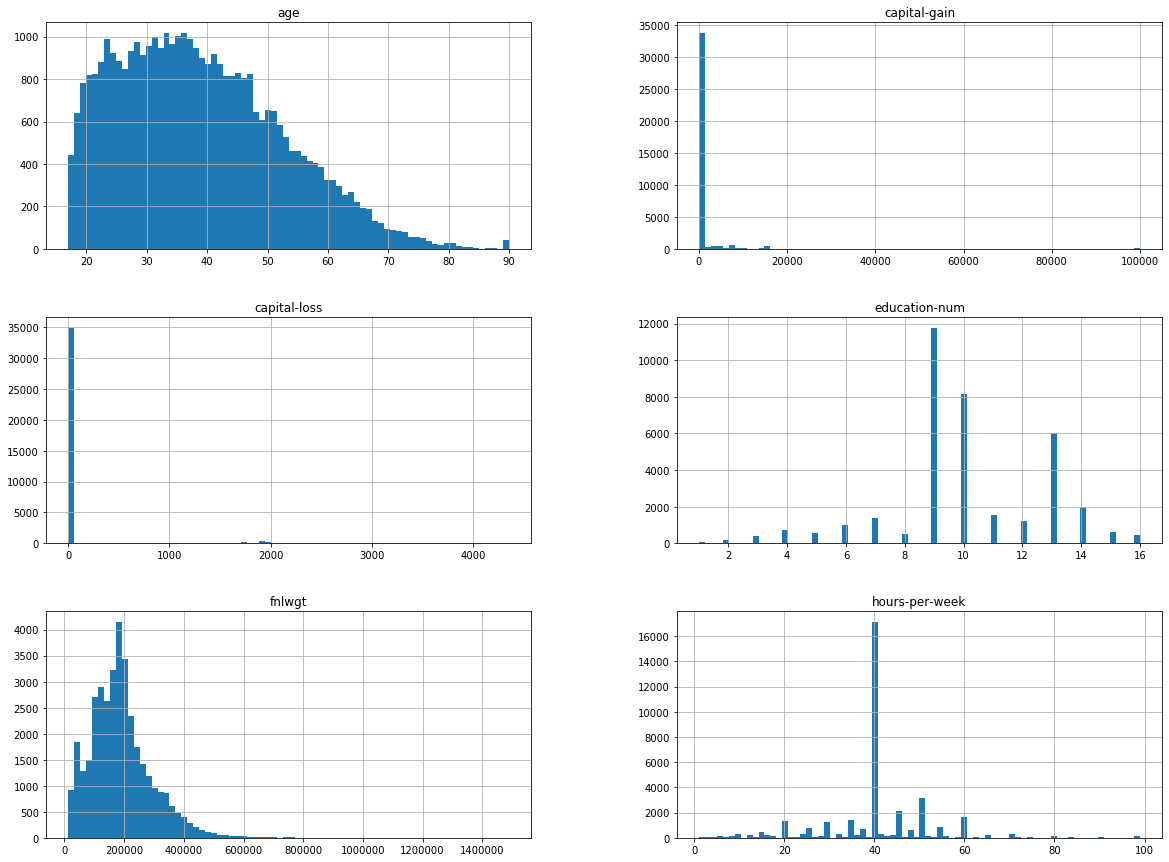

In [56]:
# Histograms of numeric features (tip:you can optimize the number of bins to match the number of values of a feature)
df_train.hist(figsize=(20,15), bins=74)
plt.show()

In [57]:
# Create a numeric version of our target so we can explore it quantitatively
df_train['<=50K Numeric'] = df_train['<=50K'].replace({'<=50K':0, '>50K':1}) 
df_train['<=50K Numeric'].value_counts()

0    27824
1     8807
Name: <=50K Numeric, dtype: int64

In [58]:
# Correlation matrix
corr = df_train.corr()
corr.style.background_gradient().set_precision(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,<=50K Numeric
age,1,-0.078,0.031,0.079,0.055,0.068,0.23
fnlwgt,-0.078,1,-0.034,-0.0012,-0.0019,-0.009,-0.0081
education-num,0.031,-0.034,1,0.13,0.084,0.15,0.33
capital-gain,0.079,-0.0012,0.13,1,-0.031,0.084,0.23
capital-loss,0.055,-0.0019,0.084,-0.031,1,0.053,0.15
hours-per-week,0.068,-0.009,0.15,0.084,0.053,1,0.23
<=50K Numeric,0.23,-0.0081,0.33,0.23,0.15,0.23,1


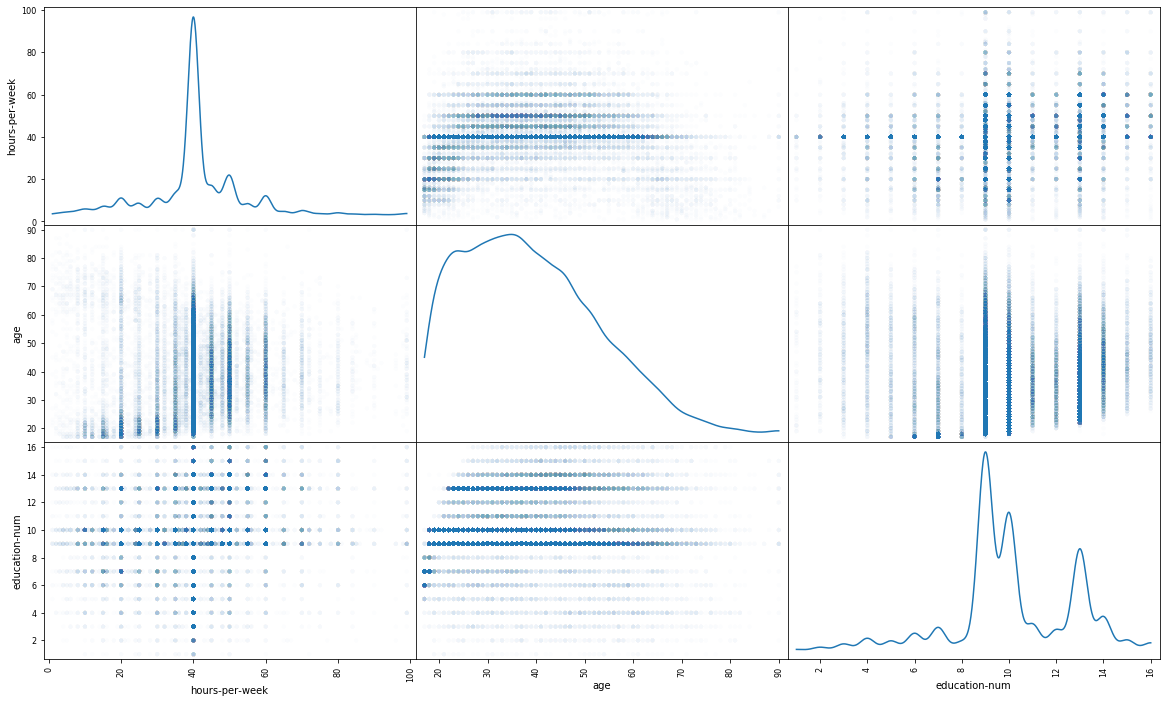

In [59]:
# Scatter matrix
_ = pd.plotting.scatter_matrix(df_train[['hours-per-week', 'age', 'education-num']], 
                   alpha = 0.01, figsize = (20, 12), diagonal = 'kde', s = 80, linewidth = 3)

## Exploring categorical features

In [60]:
# Check the ditribution of values for marital status 
df_train['marital-status'].value_counts()

Married-civ-spouse       16843
Never-married            12074
Divorced                  4960
Separated                 1135
Widowed                   1117
Married-spouse-absent      470
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [61]:
# Display distribution as share in population
df_train['marital-status'].value_counts() / df_train.shape[0]

Married-civ-spouse      0.460
Never-married           0.330
Divorced                0.135
Separated               0.031
Widowed                 0.030
Married-spouse-absent   0.013
Married-AF-spouse       0.001
Name: marital-status, dtype: float64

In [62]:
# Show the rate of positives for each value
df_train.groupby('marital-status')['<=50K Numeric'].mean()

marital-status
Divorced                0.101
Married-AF-spouse       0.375
Married-civ-spouse      0.447
Married-spouse-absent   0.096
Never-married           0.045
Separated               0.065
Widowed                 0.088
Name: <=50K Numeric, dtype: float64

In [63]:
# Now let's define a function that does it all for us

def explore_categorical_feature(var, df = df_train, target = '<=50K Numeric'):
    '''
    This function performs EDA of categorical features.
    '''
    cat_explore = pd.concat([df[var].value_counts(), df[var].value_counts()/df.shape[0], df.groupby(var)[target].mean()], 
                            axis=1, sort=False, 
                            keys=['Count', 'Share', 'Positive Rate'])
    cat_explore.index.name = var    
    return cat_explore

# Display results in a user friendly format
return_dtaframe = explore_categorical_feature('marital-status').style.format({
        'Count': '{:,d}'.format, 
        'Share': '{:,.1%}'.format, 
        'Positive Rate': '{:,.1%}'.format})

In [64]:
explore_categorical_feature('workclass').style.format({
        'Count': '{:,d}'.format, 
        'Share': '{:,.1%}'.format, 
        'Positive Rate': '{:,.1%}'.format})

,Count,Share,Positive Rate
workclass,,,
Private,"25,366",69.2%,21.9%
Self-emp-not-inc,"2,916",8.0%,27.4%
Local-gov,"2,358",6.4%,29.6%
?,"2,108",5.8%,9.6%
State-gov,"1,520",4.1%,26.8%
Self-emp-inc,"1,268",3.5%,56.3%
Federal-gov,"1,073",2.9%,39.0%
Without-pay,14,0.0%,14.3%
Never-worked,8,0.0%,0.0%


In [65]:
explore_categorical_feature('education').style.format({
        'Count': '{:,d}'.format, 
        'Share': '{:,.1%}'.format, 
        'Positive Rate': '{:,.1%}'.format})

,Count,Share,Positive Rate
education,,,
HS-grad,"11,776",32.1%,16.1%
Some-college,"8,147",22.2%,18.9%
Bachelors,"6,043",16.5%,41.3%
Masters,"1,991",5.4%,54.4%
Assoc-voc,"1,542",4.2%,25.3%
11th,"1,371",3.7%,5.3%
Assoc-acdm,"1,212",3.3%,26.2%
10th,"1,018",2.8%,6.8%
7th-8th,725,2.0%,6.5%


In [66]:
explore_categorical_feature('education-num').style.format({
        'Count': '{:,d}'.format, 
        'Share': '{:,.1%}'.format, 
        'Positive Rate': '{:,.1%}'.format})

,Count,Share,Positive Rate
education-num,,,
1,65,0.2%,1.5%
2,196,0.5%,3.6%
3,390,1.1%,5.6%
4,725,2.0%,6.5%
5,568,1.6%,4.9%
6,"1,018",2.8%,6.8%
7,"1,371",3.7%,5.3%
8,510,1.4%,7.3%
9,"11,776",32.1%,16.1%


In [67]:
# Show all combinations of values in 'education-num' and 'education'.
# Not that there is a one-to-one match between these columns
df_train.groupby(['education-num'])['education'].value_counts()

education-num  education   
1              Preschool          65
2              1st-4th           196
3              5th-6th           390
4              7th-8th           725
5              9th               568
6              10th             1018
7              11th             1371
8              12th              510
9              HS-grad         11776
10             Some-college     8147
11             Assoc-voc        1542
12             Assoc-acdm       1212
13             Bachelors        6043
14             Masters          1991
15             Prof-school       622
16             Doctorate         455
Name: education, dtype: int64

In [68]:
# Build a dataframe with exploratory analysis that shows both columns
education_explore = explore_categorical_feature('education-num').sort_index()
education_explore['Education'] = df_train.groupby(['education-num'])['education'].max()
education_explore[['Education', 'Count', 'Share', 'Positive Rate']].style.format({
        'Education': '{}'.format, 
        'Count': '{:,d}'.format, 
        'Share': '{:,.1%}'.format, 
        'Positive Rate': '{:,.1%}'.format})

,Education,Count,Share,Positive Rate
education-num,,,,
1,Preschool,65,0.2%,1.5%
2,1st-4th,196,0.5%,3.6%
3,5th-6th,390,1.1%,5.6%
4,7th-8th,725,2.0%,6.5%
5,9th,568,1.6%,4.9%
6,10th,"1,018",2.8%,6.8%
7,11th,"1,371",3.7%,5.3%
8,12th,510,1.4%,7.3%
9,HS-grad,"11,776",32.1%,16.1%


In [69]:
explore_categorical_feature('occupation').style.format({
        'Count': '{:,d}'.format, 
        'Share': '{:,.1%}'.format, 
        'Positive Rate': '{:,.1%}'.format})

,Count,Share,Positive Rate
occupation,,,
Prof-specialty,"4,674",12.8%,44.9%
Craft-repair,"4,632",12.6%,23.2%
Exec-managerial,"4,561",12.5%,47.6%
Adm-clerical,"4,177",11.4%,13.7%
Sales,"4,116",11.2%,26.8%
Other-service,"3,625",9.9%,4.3%
Machine-op-inspct,"2,255",6.2%,12.1%
?,"2,116",5.8%,9.6%
Transport-moving,"1,771",4.8%,20.9%


In [70]:
explore_categorical_feature('relationship').style.format({
        'Count': '{:,d}'.format, 
        'Share': '{:,.1%}'.format, 
        'Positive Rate': '{:,.1%}'.format})

,Count,Share,Positive Rate
relationship,,,
Husband,"14,841",40.5%,44.9%
Not-in-family,"9,479",25.9%,10.2%
Own-child,"5,639",15.4%,1.6%
Unmarried,"3,777",10.3%,5.9%
Wife,"1,761",4.8%,47.2%
Other-relative,"1,134",3.1%,3.4%


In [71]:
explore_categorical_feature('race').style.format({
        'Count': '{:,d}'.format, 
        'Share': '{:,.1%}'.format, 
        'Positive Rate': '{:,.1%}'.format})

,Count,Share,Positive Rate
race,,,
White,"31,323",85.5%,25.5%
Black,"3,496",9.5%,12.5%
Asian-Pac-Islander,"1,152",3.1%,27.0%
Amer-Indian-Eskimo,354,1.0%,10.5%
Other,306,0.8%,11.8%


In [72]:
explore_categorical_feature('sex').style.format({
        'Count': '{:,d}'.format, 
        'Share': '{:,.1%}'.format, 
        'Positive Rate': '{:,.1%}'.format})

,Count,Share,Positive Rate
sex,,,
Male,"24,569",67.1%,30.4%
Female,"12,062",32.9%,11.0%


In [73]:
explore_categorical_feature('native-country').style.format({
        'Count': '{:,d}'.format, 
        'Share': '{:,.1%}'.format, 
        'Positive Rate': '{:,.1%}'.format})

,Count,Share,Positive Rate
native-country,,,
United-States,"32,808",89.6%,24.4%
Mexico,750,2.0%,5.5%
?,648,1.8%,27.9%
Philippines,230,0.6%,30.4%
Germany,169,0.5%,29.0%
Puerto-Rico,144,0.4%,11.8%
Canada,141,0.4%,35.5%
India,113,0.3%,36.3%
El-Salvador,111,0.3%,7.2%


In [74]:
# Check correlation between unknown values. This will inform how we treat missing values.
df_train['unknwon workclass'] = df_train['workclass'] == '?'
df_train['unknwon occupation'] = df_train['occupation'] == '?'
df_train['unknwon native-country'] = df_train['native-country'] == '?'
corr = df_train[['unknwon workclass', 'unknwon occupation', 'unknwon native-country']].corr()
corr.style.background_gradient().set_precision(2)

,unknwon workclass,unknwon occupation,unknwon native-country
unknwon workclass,1,1,-0.00026
unknwon occupation,1,1,-0.00038
unknwon native-country,-0.00026,-0.00038,1


# Bias & Fairness in Machine Learning
The data exploration shows that our target feature is correlated with features such as race, sex and age. If we use these features to develop the best possible model, MetLife would end up making business decisions to target potential customers based on race, sex and age. Is this legitimate?

As ML algorithms drive more and more business decisions, issues of fariness and bias receive a lot of attentions. Here is [an article about well-know case](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) in which the use of a machine learning model to make decisions about releasing offenders from jail resulted in strong racial bias. Bias in ML models can result not only from a correlation between a demographic feature and a the target feature, but also from some subgroups having more training data than others. Imbalanced data can result in those subgroups having a higher error rate that others, as in [the linked story](https://medium.com/@Joy.Buolamwini/response-racial-and-gender-bias-in-amazon-rekognition-commercial-ai-system-for-analyzing-faces-a289222eeced).

Best practices for dealing with these situations are still emerging - both industry-wide and here at MetLife. However, the general guideline is that it is our responsibility to look at these issues and bring them up. DnA is working to develop an ethics review from analytics projects, similar to the privacy review that we do. Until this is launched, you can follow these guidelines:

* When working on a new analytics project, test for issues of bias and fairness due correlation of the target variable with sensitive features (gender, race, national identity, family/marital status, age) or due to some subgroups having insufficient data that results in high error rates. 

* If you suspect bias & fairness may be an issue in your project: 1) bring it up with your manager; and 2) click the "Speak Up" icon on your desktop and write brief message about the issue. The message will reach the Ethics group, and they will be in touch to help address the issue.  


# Homework
1. Keep exploring the dataset and see shat patterns you can find in the data.
2. Add to the dataset at least three features you create based on the original features. You may use external data.  